In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Train-Set.csv')

# inspecting the data

In [ ]:
print(df.head())

  ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.270

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
            Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean  

# dropping irrelevant columns

# not considering ProductID, and **OutletID**

In [ ]:
df.drop(['ProductID', 'OutletID'], axis=1, inplace=True)

#filling missing values

# for [WEIGHT]

In [ ]:
print(df['Weight'].skew())

0.0824262091221237


#approximately symmetric
#finding if there are any outliers

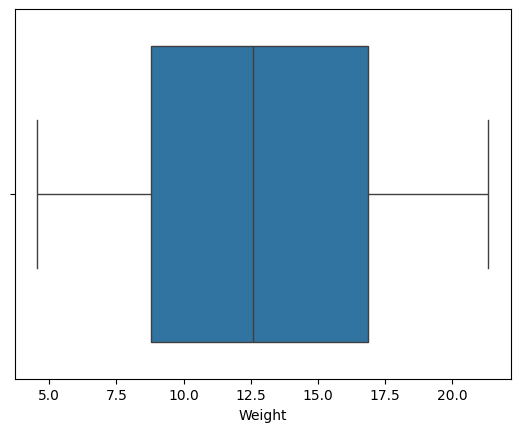

In [ ]:
sns.boxplot(x=df['Weight'])
plt.show()

In [ ]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

#for [OutletSize]

# filling missing values in OuletSize based on the OutletType

In [ ]:
mode_of_Outlet_size = df.pivot_table(values='OutletSize', columns='OutletType', aggfunc=lambda x: x.mode()[0])
print(mode_of_Outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
miss_values = df['OutletSize'].isnull()
df.loc[miss_values, 'OutletSize'] = df.loc[miss_values, 'OutletType'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
df.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

### no missing values

### CHECKING FOR UNIQUE VALUES IN CATEGORICAL COLUMNS

In [ ]:
categorical_cols = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']

for col in categorical_cols:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-" * 40)

FatContent unique values:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------
ProductType unique values:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
OutletSize unique values:
['Medium' 'Small' 'High']
----------------------------------------
LocationType unique values:
['Tier 1' 'Tier 3' 'Tier 2']
----------------------------------------
OutletType unique values:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
----------------------------------------


In [ ]:
df['FatContent'] = df['FatContent'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [ ]:
print(df['FatContent'].unique())

['Low Fat' 'Regular']


### LABEL ENCODING

In [ ]:
df = pd.get_dummies(df, columns=[
    'FatContent', 'ProductType', 'OutletSize',
    'LocationType', 'OutletType'
], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   EstablishmentYear                  8523 non-null   int64  
 4   OutletSales                        8523 non-null   float64
 5   FatContent_Regular                 8523 non-null   bool   
 6   ProductType_Breads                 8523 non-null   bool   
 7   ProductType_Breakfast              8523 non-null   bool   
 8   ProductType_Canned                 8523 non-null   bool   
 9   ProductType_Dairy                  8523 non-null   bool   
 10  ProductType_Frozen Foods           8523 non-null   bool   
 11  ProductType_Fruits and Vegetables  8523 non-null   bool 

## adding Outlet_age and dropping Establishment Year

In [ ]:
df['OutletAge'] = 2025 - df['EstablishmentYear']
df.drop('EstablishmentYear', axis=1, inplace=True)

In [ ]:
X = df.drop(columns='OutletSales', axis=1).values
Y = df['OutletSales'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 27) (6818, 27) (1705, 27)


In [ ]:
# Normalize (important for gradient descent)

# Convert the entire X_train and X_test arrays to float64 before calculating mean and std
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

# Check if any element in x_std is zero and replace with a small value to avoid division by zero
x_std[x_std == 0] = 1e-10  # Replace 0 with a small positive value

X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

In [ ]:
# Add bias term manually
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Linear Regression

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.n_iters):
            y_pred = X.dot(self.theta)
            error = y_pred - y
            gradients = (2/m) * X.T.dot(error)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        return X.dot(self.theta)

# Train the model

In [ ]:
model = LinearRegressionScratch(learning_rate=0.001, n_iters=1000)
model.fit(X_train, Y_train)


In [ ]:
# 1. Extract weights from your custom model
theta = model.theta  # Includes intercept as first element
intercept = theta[0]
coefficients = theta[1:]

# 2. Extract actual feature names
feature_names = df.drop('OutletSales', axis=1).columns

# 3. Create DataFrame to display
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 4. Display results
print("Intercept:", intercept)
print("\nTop Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))


Intercept: 1904.903823004737

Top Coefficients:
                              Feature  Coefficient
2                                 MRP   843.926256
25       OutletType_Supermarket Type3   445.503705
23       OutletType_Supermarket Type1   320.339909
21                LocationType_Tier 2   205.540651
19                  OutletSize_Medium   197.359560
9   ProductType_Fruits and Vegetables    25.537430
3                  FatContent_Regular    18.663128
15                ProductType_Seafood    16.417516
18          ProductType_Starchy Foods    15.513494
6                  ProductType_Canned    13.614169
16            ProductType_Snack Foods    11.567845
5               ProductType_Breakfast     6.920837
12              ProductType_Household     4.395859
22                LocationType_Tier 3     1.835461
10            ProductType_Hard Drinks     1.370836
4                  ProductType_Breads    -1.750705
13                   ProductType_Meat    -1.992878
8            ProductType_Frozen Fo

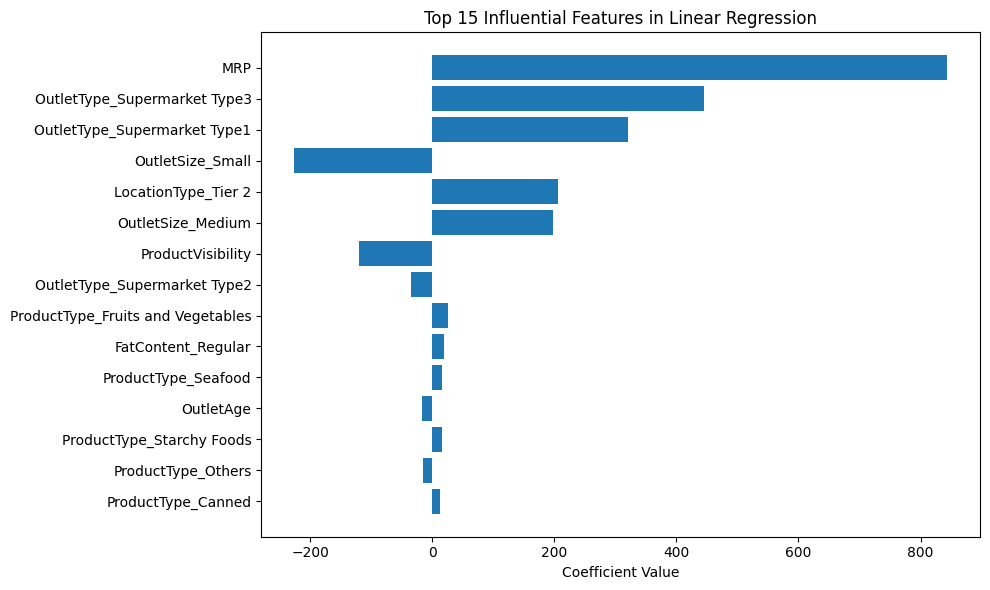

In [ ]:
import matplotlib.pyplot as plt

# Plot top 15 features
top_features = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)[:15]

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Coefficient'][::-1])
plt.title("Top 15 Influential Features in Linear Regression")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [ ]:
# Make predictions
y_pred_lr = model.predict(X_test)

# Print only first 10 rows with their feature values, predicted and actual sales
for i in range(min(10, len(X_test))):
    features = X_test[i]
    print(f"Row {i+1}: Features = {features}, Predicted = {y_pred_lr[i]:.2f}, Actual = {Y_test[i]:.2f}")



Row 1: Features = [ 1.          0.33571101 -0.77388703 -0.99890847 -0.74392811 -0.16931115
 -0.11302569 -0.28524375 -0.29210126  3.00195727 -0.4150703  -0.16607531
 -0.25261929 -0.34998471 -0.2237273  -0.14426191 -0.08420275 -0.4075145
 -0.23401891 -0.13832221 -0.69787026 -1.13588074 -0.69926489  1.23384867
  0.73041993 -0.35209326 -0.35445699  1.29324011], Predicted = 1163.46, Actual = 1743.06
Row 2: Features = [ 1.         -1.17175193  0.09797779 -1.58604822 -0.74392811 -0.16931115
 -0.11302569 -0.28524375 -0.29210126 -0.333116   -0.4150703  -0.16607531
  3.95852582 -0.34998471 -0.2237273  -0.14426191 -0.08420275 -0.4075145
 -0.23401891 -0.13832221 -0.69787026  0.88037411 -0.69926489 -0.81047216
  0.73041993 -0.35209326 -0.35445699  0.10206572], Predicted = 94.46, Actual = 356.87
Row 3: Features = [ 1.          0.38304109 -0.48194218 -1.59665209  1.34421592 -0.16931115
 -0.11302569  3.50577357 -0.29210126 -0.333116   -0.4150703  -0.16607531
 -0.25261929 -0.34998471 -0.2237273  -0.144

In [ ]:
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(Y_test, y_pred_lr))
r2_lr = r2_score(Y_test, y_pred_lr)


In [ ]:
# Print results
print("🔹 Linear Regression")
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)

🔹 Linear Regression
RMSE: 1161.9193607591808
R² Score: 0.5032849634773395


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   OutletSales                        8523 non-null   float64
 4   FatContent_Regular                 8523 non-null   bool   
 5   ProductType_Breads                 8523 non-null   bool   
 6   ProductType_Breakfast              8523 non-null   bool   
 7   ProductType_Canned                 8523 non-null   bool   
 8   ProductType_Dairy                  8523 non-null   bool   
 9   ProductType_Frozen Foods           8523 non-null   bool   
 10  ProductType_Fruits and Vegetables  8523 non-null   bool   
 11  ProductType_Hard Drinks            8523 non-null   bool 